# Problem Statement

Customer Behaviour and it’s prediction lies
at the core of every Business Model. From
Stock Exchange, e Commerce and
Automobile to even Presidential Elections,
predictions serve a great purpose. Most of
these predictions are based on the data
available about a person’s activity either
online or in person.

Recommendation Engines are the much
needed manifestations of the desired
Predictability of User Activity.
Recommendation Engines move one step
further and not only give information but
put forth strategies to further increase users
interaction with the platform.

In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices.

#### The purpose of this Project we will be creating one such Recommendation Engine from the ground up, where every single user, based on there area of interest and ratings, would be recommended a list of movies that are best suited for them.

# Dataset Information

1. ID - Contains the separate keys for customer and movies.
2. Rating- A section contains the user ratings for all the movies.
3. Genre- Highlights the category of the movie.
4. Movie Name- Name of the movie with respect to the movie id.

# Objective

1. Find out the list of most popular and liked genre
2. Create Model that finds the best suited Movie for one user in every genre.
3. Find what Genre Movies have received the best and worst ratings based on User Rating.

In [3]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading dataset
df_net=pd.read_csv('combined_data_1.txt',header=None,names=['Cust_Id','Ratings'],usecols=[0,1])

In [15]:
df_net.head()

,Cust_Id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [16]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Ratings  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [17]:
#calculating NaN values to find out the number of movie IDs
df_net.isna().sum()  # number of movie IDs

Cust_Id       0
Ratings    4499
dtype: int64

In [18]:
# checking number of unique customers (total)
ucust=df_net['Cust_Id'].nunique()
ucust

475257

In [19]:
# in this value movie ID count is also included to to get real number of unique customers 
# will substract it from total count of unique customers

In [20]:
# actual count of unique customers
actual_ucust=ucust-4499
actual_ucust

470758

In [21]:
# segregating the ratings
ratings=df_net.groupby('Ratings')['Ratings'].agg(['count'])
ratings

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


<Axes: ylabel='Ratings'>

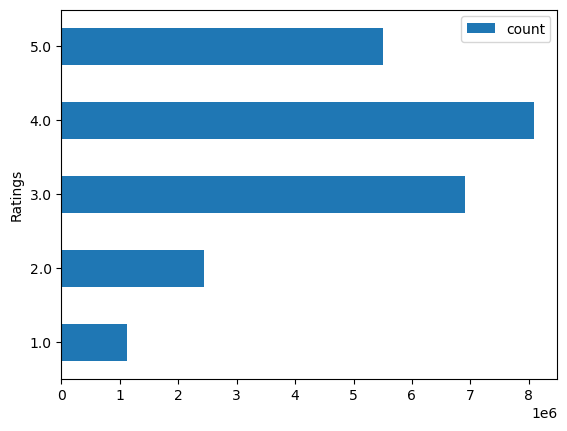

In [22]:
ratings.plot(kind='barh')

In [23]:
# We are trying to add a new column 'movie id'
# however we are aware that at null places there are movie ids

df_net_nan=pd.DataFrame(pd.isna(df_net.Ratings))
df_net_nan

# In the output True represents NaN values. so all the 'True' means movie Ids

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [24]:
# from one 'True' to next 'True' will come under one movie Id. so next movie ID will start from next 'True'

In [28]:
# i will take only those values which values = True
df_net_nan=df_net_nan[df_net_nan['Ratings']==True]
df_net_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [76]:
# 0-547 -> movie id 1
# 548-693 -> movie id 2
#.
#.

In [29]:
df_net_nan=df_net_nan.reset_index()
df_net_nan

,index,Ratings
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [30]:
# slicing -> [start:stop-1:step]
df_net_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [31]:
df_net_nan['index'][:-1] # -1 is reverse indexing means till -2 index

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [32]:
# np.full((row,col),filling value)
np.full((1,12),2)

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [33]:
# zip() -> creates a tuple
# making the above 2 output dataframe side by side.

for i,j in zip(df_net_nan['index'][1:],df_net_nan['index'][:-1]):
    print(i,j)

548 0
694 548
2707 694
2850 2707
3991 2850
5011 3991
5105 5011
20016 5105
20112 20016
20362 20112
20561 20362
21108 20561
21234 21108
21353 21234
21644 21353
24344 21644
31453 24344
42176 31453
42716 42176
42833 42716
43052 42833
43256 43052
43872 43256
45206 43872
46414 45206
52276 46414
52550 52276
92303 52550
92827 92303
211241 92827
211463 211241
213318 211463
220209 213318
220318 220209
221158 220318
222098 221158
222380 222098
223183 222380
223936 223183
224428 223936
224522 224428
224651 224522
224757 224651
233259 224757
235879 233259
242438 235879
244789 242438
248381 244789
248613 248381
248942 248613
249033 248942
254181 249033
254296 254181
254456 254296
256863 254456
258697 256863
262260 258697
279666 262260
279871 279666
280167 279871
280315 280167
280606 280315
280791 280606
280887 280791
281146 280887
281313 281146
281603 281313
283820 281603
283937 283820
284281 283937
285843 284281
286023 285843
286771 286023
287160 286771
287380 287160
290335 287380
303934 290335
308

In [34]:
# creating empty array for movie
# creating a variable for movie id

# i-j-1 = desired output
# 548-0-1=547 means 547 rows will fill with movie id 1
# again 694-548-1=145 means next 145 rows will fill with movie id 2 and so on.

movie_np=[]
movie_id =1

for i,j in zip((df_net_nan['index'][1:]),(df_net_nan['index'][:-1])):
    temp=np.full((1,i-j-1),movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id=movie_id+1

In [35]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [36]:
len(movie_np)

24053336

In [37]:
len(df_net)

24058263

In [38]:
df_net_nan.iloc[-1,0]

24057834

In [39]:
# The last record was getting missed , so we are trying to get last record to avoid any mismatch in dataset

last_record=np.full((1,len(df_net)-df_net_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)

print(len(movie_np))

24053764


In [40]:
len(df_net)-len(movie_np)   # The number of movies or we can say the null values

4499

In [41]:
df_net=df_net[pd.notnull(df_net['Ratings'])]
df_net['Movie_Id']=movie_np.astype(int)
df_net['Cust_Id']=df_net['Cust_Id'].astype(int)

In [42]:
df_net.head(5)

,Cust_Id,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [43]:
f=['count','mean']

In [44]:
movie_summary=df_net.groupby('Movie_Id').agg(f)
movie_summary

Cust_Id               Ratings          
           count          mean   count      mean
Movie_Id                                        
1            547  1.249876e+06     547  3.749543
2            145  1.341926e+06     145  3.558621
3           2012  1.324290e+06    2012  3.641153
4            142  1.402854e+06     142  2.739437
5           1140  1.302384e+06    1140  3.919298
...          ...           ...     ...       ...
4495         614  1.321093e+06     614  3.478827
4496        9519  1.332006e+06    9519  3.763000
4497         714  1.330543e+06     714  2.715686
4498         269  1.262035e+06     269  2.464684
4499         428  1.270551e+06     428  2.614486

[4499 rows x 4 columns]

In [45]:
movie_summary=df_net.groupby('Movie_Id')['Ratings'].agg(f)
movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [46]:
movie_summary['count'].quantile(0.75) 


2538.0

In [47]:
# setting up a benchmark - taking only those movies that are rated 2538 times
# top 75% of the values means 75% of customers has rated more than 2538 movies 
movie_benchmark=round(movie_summary['count'].quantile(0.75))
movie_benchmark

2538

In [48]:
drop_movie_list=movie_summary[movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3374)

In [49]:
# considering only those customers who have rated some movies

cust_summary=df_net.groupby('Cust_Id')['Ratings'].agg(f)
cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [50]:
# creating a customer benchmark of 70
# means what is the total no of movie rated out of that we will only consider only those poeple 
# who are rating atleast 70% of movies

cust_benchmark=round(cust_summary['count'].quantile(0.7))
cust_benchmark

52

In [51]:
# so benchmark is coming 52 means 52 movies should be atleast rated by user to be put into a recommendation pool.
# other words, a customer should have rated atleast 52 movies in his lifetime then only he is eligible in recommendation pool.

In [52]:
drop_cust_list=cust_summary[cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [53]:
df_net=df_net[~df_net['Movie_Id'].isin(drop_movie_list)]
df_net=df_net[~df['Cust_Id'].isin(drop_cust_list)]
print("The dataset after dropping/ trimming is ",df.shape)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5848\341790568.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_net=df_net[~df['Cust_Id'].isin(drop_cust_list)]


The dataset after dropping/ trimming is  (24058263, 2)


# SVD (Singular Value Decomposition)

The algorithm used to recommendation system is SVD (Singular Value Decomposition). SVD is always used in Recommendation systems.

In [54]:
!pip install scikit-surprise

In [55]:
df_title=pd.read_csv('movie_titles (1).csv',encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])

In [56]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


## Model Building for recommendation

In [57]:
import math
import seaborn as sns
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [58]:
# Reader is used in reading the data in the particular format so as it can be fitted into our SVD  model

reader=Reader()

In [59]:
data=Dataset.load_from_df(df_net[['Cust_Id','Movie_Id','Ratings']][:100000],reader)

In [61]:
svd=SVD()

In [63]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0348  1.0328  1.0348  1.0362  1.0397  1.0357  0.0023  
MAE (testset)     0.8295  0.8271  0.8242  0.8291  0.8295  0.8279  0.0020  
Fit time          1.52    1.44    1.44    1.45    1.44    1.46    0.03    
Test time         0.21    0.15    0.14    0.34    0.16    0.20    0.08    


{'test_rmse': array([1.03482479, 1.03283417, 1.03476687, 1.0362186 , 1.03974788]),
 'test_mae': array([0.82945732, 0.82713345, 0.82419035, 0.82913604, 0.82954035]),
 'fit_time': (1.5153923034667969,
  1.4393181800842285,
  1.4399325847625732,
  1.4482758045196533,
  1.4352648258209229),
 'test_time': (0.2095167636871338,
  0.14700579643249512,
  0.13679790496826172,
  0.34127378463745117,
  0.1588892936706543)}

In [65]:
df_net.head(50)

,Cust_Id,Ratings,Movie_Id
5106,824097,2.0,8
5107,2630686,5.0,8
5108,644003,3.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5111,229220,4.0,8
5112,1447783,4.0,8
5113,2580478,4.0,8
5114,2599087,3.0,8
5115,2352464,5.0,8


In [79]:
dataset_1829027=df_net[(df_net['Cust_Id']==1829027) & (df_net['Ratings']==5)]
dataset_1829027

,Cust_Id,Ratings,Movie_Id
5172,1829027,5.0,8
577605,1829027,5.0,175
1498110,1829027,5.0,312
2369594,1829027,5.0,457
3014018,1829027,5.0,571
4478039,1829027,5.0,886
4675214,1829027,5.0,918
4756095,1829027,5.0,953
6941312,1829027,5.0,1394
6961029,1829027,5.0,1399


In [80]:
user_1829027=df_title.copy()
user_1829027

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [82]:
user_1829027.reset_index(inplace=True)
user_1829027

,index,Movie_Id,Year,Name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [83]:
# only considering those movies that are rated by the user
# we are not interested in the whole list

user_1829027=user_1829027[~user_1829027['Movie_Id'].isin(drop_movie_list)]
user_1829027

,index,Movie_Id,Year,Name
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
25,25,26,2004.0,Never Die Alone
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [84]:
user_1829027['Estimated_rating']=user_1829027['Movie_Id'].apply(lambda x:svd.predict(1829027,x).est)

# 1829027 is cust_id
# here x is movie id
# est is estimated score

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5848\2285526581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1829027['Estimated_rating']=user_1829027['Movie_Id'].apply(lambda x:svd.predict(1829027,x).est)


In [85]:
user_1829027

,index,Movie_Id,Year,Name,Estimated_rating
7,7,8,2004.0,What the #$*! Do We Know!?,4.794152
15,15,16,1996.0,Screamers,3.036222
16,16,17,2005.0,7 Seconds,2.497973
17,17,18,1994.0,Immortal Beloved,3.897130
25,25,26,2004.0,Never Die Alone,2.882020
...,...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.667736
17766,17766,17767,2004.0,Fidel Castro: American Experience,3.667736
17767,17767,17768,2000.0,Epoch,3.667736
17768,17768,17769,2003.0,The Company,3.667736


In [86]:
user_1829027= user_1829027.drop(['Movie_Id','index'],axis=1)

In [87]:
user_1829027

,Year,Name,Estimated_rating
7,2004.0,What the #$*! Do We Know!?,4.794152
15,1996.0,Screamers,3.036222
16,2005.0,7 Seconds,2.497973
17,1994.0,Immortal Beloved,3.897130
25,2004.0,Never Die Alone,2.882020
...,...,...,...
17765,2002.0,Where the Wild Things Are and Other Maurice Se...,3.667736
17766,2004.0,Fidel Castro: American Experience,3.667736
17767,2000.0,Epoch,3.667736
17768,2003.0,The Company,3.667736


In [88]:
user_1829027.sort_values('Estimated_rating',ascending=False)

,Year,Name,Estimated_rating
7,2004.0,What the #$*! Do We Know!?,4.794152
27,2002.0,Lilo and Stitch,4.081287
29,2003.0,Something's Gotta Give,3.989598
17,1994.0,Immortal Beloved,3.897130
12970,2003.0,Dracula: Pages from a Virgin's Diary,3.667736
...,...,...,...
8181,1998.0,In Heaven as it is on Earth,3.667736
8182,1967.0,I Am Curious: Blue,3.667736
15,1996.0,Screamers,3.036222
25,2004.0,Never Die Alone,2.882020
